In [1]:
## Bring in the important stuff!

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os
import xarray as xr

from netCDF4 import Dataset
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from pandas import Timestamp
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, extract_times, ALL_TIMES, interplevel
from glob import glob

mpl.use('Agg')
%matplotlib inline

/glade/u/apps/ch/opt/pythonpkgs/2.7/xarray/0.9.5/intel/16.0.3/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime
/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
## Bring in wrfout data as 'filenames'
## based on ensemble member

path = '/glade/work/jpiers/WRFV3/run' # set path to where wrfout files are located
filenames0 = sorted(glob(path+'/wrfout_10_2/wrfout_d0*')) # define filenames, sorted by time
filenames1 = sorted(glob(path+'/wrfout_10_1/wrfout_d0*'))
filenames2 = sorted(glob(path+'/wrfout_8_2/wrfout_d0*'))
filenames3 = sorted(glob(path+'/wrfout_8_1/wrfout_d0*'))
filenames4 = sorted(glob(path+'/wrfout_17_2/wrfout_d0*'))
filenames5 = sorted(glob(path+'/wrfout_17_1/wrfout_d0*'))



In [3]:
## Create lists 'files' and 'times' that will be used for making plots
## Print times - for diagnostic purposes

    
files0=[]
times0=[]

for file in filenames0:
    files0.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times0.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))

files1=[]
times1=[]
    
for file in filenames1:
    files1.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times1.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files2=[]
times2=[]

for file in filenames2:
    files2.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times2.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files3=[]
times3=[]

for file in filenames3:
    files3.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times3.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files4=[]
times4=[]

for file in filenames4:
    files4.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times4.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))
    
files5=[]
times5=[]

for file in filenames5:
    files5.append(Dataset(file))
    print(os.path.basename(file)[11:])
    times5.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))

2016-12-25_00:00:00
2016-12-25_01:00:00
2016-12-25_02:00:00
2016-12-25_03:00:00
2016-12-25_04:00:00
2016-12-25_05:00:00
2016-12-25_06:00:00
2016-12-25_07:00:00
2016-12-25_08:00:00
2016-12-25_09:00:00
2016-12-25_10:00:00
2016-12-25_11:00:00
2016-12-25_12:00:00
2016-12-25_13:00:00
2016-12-25_14:00:00
2016-12-25_15:00:00
2016-12-25_16:00:00
2016-12-25_17:00:00
2016-12-25_18:00:00
2016-12-25_19:00:00
2016-12-25_20:00:00
2016-12-25_21:00:00
2016-12-25_22:00:00
2016-12-25_23:00:00
2016-12-26_00:00:00
2016-12-26_01:00:00
2016-12-26_02:00:00
2016-12-26_03:00:00
2016-12-26_04:00:00
2016-12-26_05:00:00
2016-12-26_06:00:00
2016-12-26_07:00:00
2016-12-26_08:00:00
2016-12-26_09:00:00
2016-12-26_10:00:00
2016-12-26_11:00:00
2016-12-26_12:00:00
2016-12-26_13:00:00
2016-12-26_14:00:00
2016-12-26_15:00:00
2016-12-26_16:00:00
2016-12-26_17:00:00
2016-12-26_18:00:00
2016-12-26_19:00:00
2016-12-26_20:00:00
2016-12-26_21:00:00
2016-12-26_22:00:00
2016-12-26_23:00:00
2016-12-27_00:00:00
2016-12-27_01:00:00


In [7]:
# RAINNC - total precip accumulation; only MYJ

variable = "RAINNC"
sum_counts = np.zeros((len(files0), 3), dtype=int)
for w, wrf_obj_list in enumerate([files0, files2, files4]):
    for t in range(len(wrf_obj_list)):
        print(w, t)
        sum_counts[t, w] = np.sum(wrf_obj_list[t].variables[variable][0].max(axis=0))

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)
(0, 50)
(0, 51)
(0, 52)
(0, 53)
(0, 54)
(0, 55)
(0, 56)
(0, 57)
(0, 58)
(0, 59)
(0, 60)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(1, 31)
(1, 32)
(1, 33)
(1, 34)
(1, 35)
(1, 36)
(1, 37)
(1, 38)
(1, 39)
(1, 40)
(1, 41)
(1, 42)
(1, 43)
(1, 44)
(1, 45)
(1, 46)
(1, 47)
(1, 48)
(1, 49)
(1, 50)
(1, 51)
(1, 52)
(1, 53)
(1, 54)
(1, 55)
(1, 56)
(1, 57)
(1, 58)
(1, 59)
(1, 60)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2

In [8]:
print(sum_counts)

[[    0     0     0]
 [  181   242    13]
 [ 1395  1602  1669]
 [ 3244  3611  4382]
 [ 5492  5647  6556]
 [ 7175  7088  8788]
 [ 8556  8482 10215]
 [ 9964 10056 11814]
 [11472 11421 13146]
 [12930 12730 14742]
 [14265 14349 16406]
 [15776 16137 18206]
 [17115 17578 20059]
 [18522 18894 21800]
 [19919 20718 23059]
 [21550 22418 24474]
 [23138 24022 25805]
 [24671 25489 27376]
 [26134 27074 29124]
 [27168 28264 30453]
 [28057 29144 32009]
 [28772 29789 33312]
 [29786 30464 34316]
 [30818 31370 34999]
 [31585 32285 35764]
 [32675 33346 36697]
 [34001 34818 37970]
 [35239 36911 39392]
 [36420 39409 41539]
 [37442 41603 43866]
 [39197 43184 46280]
 [41144 44607 48975]
 [42635 45927 52581]
 [43943 47129 55915]
 [45155 48373 58348]
 [46590 49943 60123]
 [47887 51472 61730]
 [49001 52700 63164]
 [49818 53690 64383]
 [50323 54541 65362]
 [50752 55116 66132]
 [51284 55470 66780]
 [51806 55771 67497]
 [52140 56239 67963]
 [52470 56569 68318]
 [52786 56836 68613]
 [53000 56979 68730]
 [53200 57243

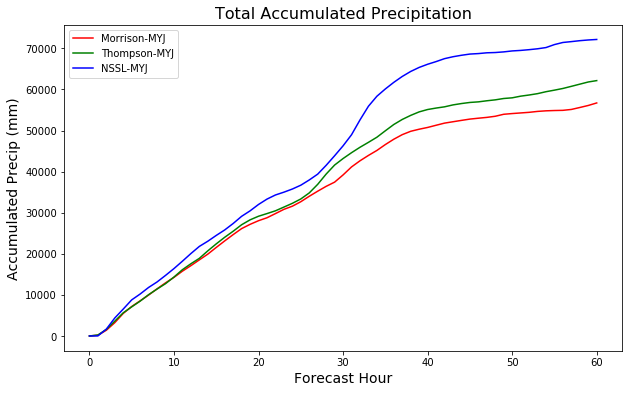

In [11]:
## only MYJ; color

count_columns = ["Morrison-MYJ", "Thompson-MYJ", "NSSL-MYJ"]
colors = ["red", "green", "blue",]
plt.figure(figsize=(10, 6))
for c in range(sum_counts.shape[1]):
    plt.plot(np.arange(61), sum_counts[:, c], label=count_columns[c], color=colors[c])
plt.legend(loc=0)
plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("Accumulated Precip (mm)", fontsize=14)
plt.title("Total Accumulated Precipitation", fontsize=16)


outpath = 'DEC16_images'
plt.savefig(outpath+'/cum_precip_myj_color_.png', bbox_inches="tight", dpi=200)